# COVID-19 and Underlying Health Conditions and Comorbidities


## Final Infographic: https://my.visme.co/view/8re9w8op-covid-19-uhc-timeline



Ngone Lo

April 2021

# Libraries

In [31]:
# for working with the data
import pandas as pd
import numpy as np
import math


# for visualization 
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import seaborn as sb
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


In [32]:
# Use pandas to read in the dataset
df = pd.read_csv("TriNetX_Table1.csv",encoding='cp1252')

In [33]:
df

,PriorCoexistingCondition,AllCOVID-19Patients,%AllCOVID-19Patients,SevereCOVID-19Patients,%SevereCOVID-19Patients,%AllCOVID-19PatientsSevere
0,Respiratory Diseases,270366,40.7,43827,48.8,6.6
1,Cardiovascular Diseases,211004,31.7,49062,54.6,7.4
2,Diabetes,78283,11.8,23428,26.1,3.5
3,Cancer,41121,6.2,11285,12.6,1.7
4,Kidney Diseass,33939,5.1,14128,15.7,2.1


# Part 1 : Visualizing The Underlying Health Conditions

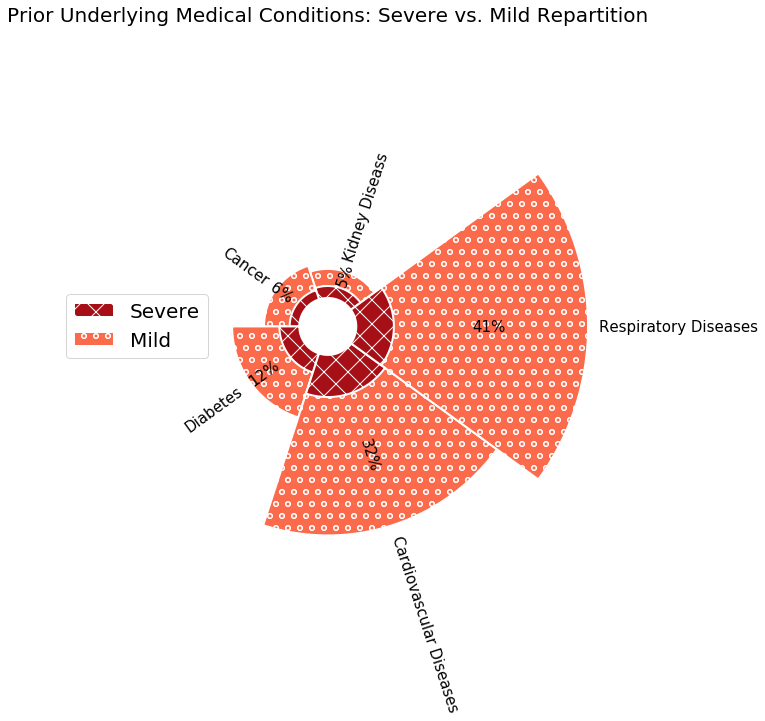

In [37]:
#circular barplot

# initialize the figure
plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Reorder the dataframe
df = df.sort_values(by=['%AllCOVID-19Patients'])

# Constants = parameters controling the plot layout:
labelPadding = 2
lowerlimit=5

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

heights=df['%AllCOVID-19Patients']

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width,
    bottom=lowerlimit,
    linewidth=2, 
    edgecolor="white",
    color="#fb6a4a",
    hatch="o",
    label='Mild'
)


# Draw bars
bars2 = ax.bar(
    x=angles, 
    height=df['%AllCOVID-19PatientsSevere'], 
    width=width,
    bottom=lowerlimit,
    linewidth=2, 
    edgecolor="white",
    color="#a50f15",
    hatch="x",
    label='Severe'
)


ax.legend([bars2, bars], ["Severe", "Mild"], loc=6, prop={'size': 20})
ax.set_title("Prior Underlying Medical Conditions: Severe vs. Mild Repartition", size=20)


# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["PriorCoexistingCondition"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=bar.get_height() + labelPadding+ lowerlimit, 
        s=label,
        size=15,
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor")
    


def autolabel(rects,col):
    """
    Attach a text label above each bar displaying its height
    """
    for bar, angle, height, label in zip(bars,angles, heights, df["PriorCoexistingCondition"]):

    # Labels are rotated. Rotation must be specified in degrees :(
        rotation = np.rad2deg(angle)

        # Flip some labels upside down
        alignment = ""
        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else: 
            alignment = "left"

        # Finally add the labels
        ax.text(
            x=angle, 
            y=bar.get_height()*0.5+lowerlimit, 
            s=str(round(height))+'%', 
            size=15,
            color=col,
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor") 

autolabel(bars, "black")

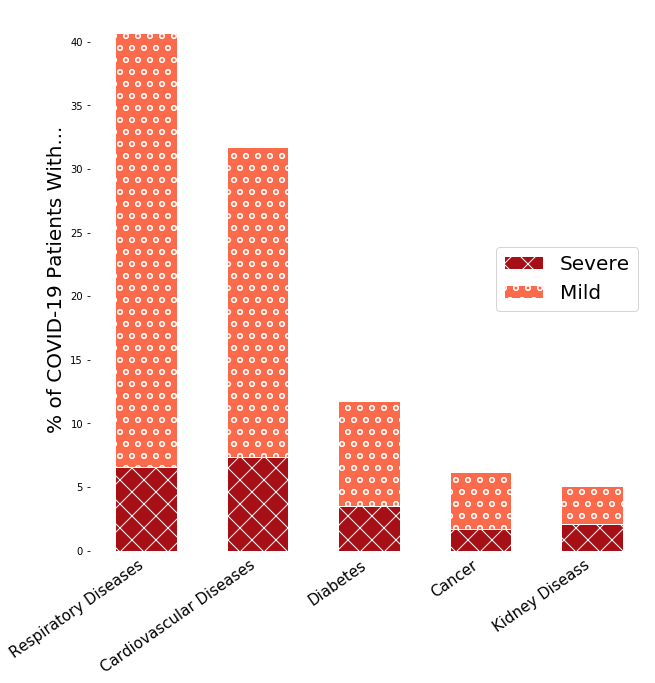

In [41]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111)

df = df.sort_values(by=['%AllCOVID-19Patients'], ascending=False)

width = 0.55       # the width of the bars: can also be len(x) sequence
#plt.axis('off')
plt.box(False)

prior=df['PriorCoexistingCondition']
mild=df['%AllCOVID-19Patients']
severe=df['%AllCOVID-19PatientsSevere']


ax.bar(prior, mild, width, label='Mild', color="#fb6a4a", hatch = 'o', edgecolor="white")
ax.bar(prior, severe, width, label='Severe', color="#a50f15", hatch = 'x', edgecolor="white")

ax.legend([bars2, bars], ["Severe", "Mild"], loc=7, prop={'size': 20})
ax.xaxis.set_ticks_position('none')
plt.xticks(rotation=35, size=15, horizontalalignment="right")
ax.set_ylabel('% of COVID-19 Patients With...', fontsize=20)





# Hide grid lines
ax.grid(False)


plt.show()

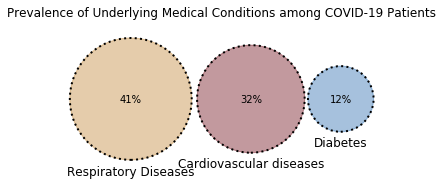

In [25]:
from matplotlib_venn import venn3, venn3_circles
 
# Make a Basic Venn
v = venn3(subsets=(40.7, 31.7, 0, 11.8, 0, 0, 0), set_labels = ('A', 'B', 'C'))
 
# Custom it
v.get_patch_by_id('A').set_color('#bf812d')
v.get_patch_by_id('010').set_color('#67000d')
v.get_patch_by_id('001').set_color('#2166ac')

v.get_label_by_id('100').set_text('41%')
v.get_label_by_id('010').set_text('32%')
v.get_label_by_id('001').set_text('12%')

v.get_label_by_id('A').set_text('Respiratory Diseases')
v.get_label_by_id('B').set_text('Cardiovascular diseases')
v.get_label_by_id('C').set_text('Diabetes')


c = venn3_circles(subsets=(40.7, 31.7, 0, 11.8, 0, 0, 0), linestyle='dotted')

 
# Add title and annotation
plt.title("Prevalence of Underlying Medical Conditions among COVID-19 Patients")
 
# Show it
plt.show()


# Part 2 : Visualizing The Symptoms & Diagnosis

In [55]:
# Use pandas to read in the dataset
df = pd.read_csv("TriNetX_Table2.csv",encoding='cp1252')

In [56]:
df.head()

,Diagnosis,AllCOVID-19Patients,%AllCOVID-19Patients,SevereCOVID-19Patients,%SevereCOVID-19Patients,%AllCOVID-19PatientsSevere
0,Cough,94259,14.2,13780,15.3,2.1
1,Pneumonia,69421,10.4,45871,51.0,6.9
2,Shortness of breath,68394,10.3,27272,30.3,4.1
3,Fever,60973,9.2,16365,18.2,2.5
4,Pain in throat and chest,35051,5.3,11437,12.7,1.7


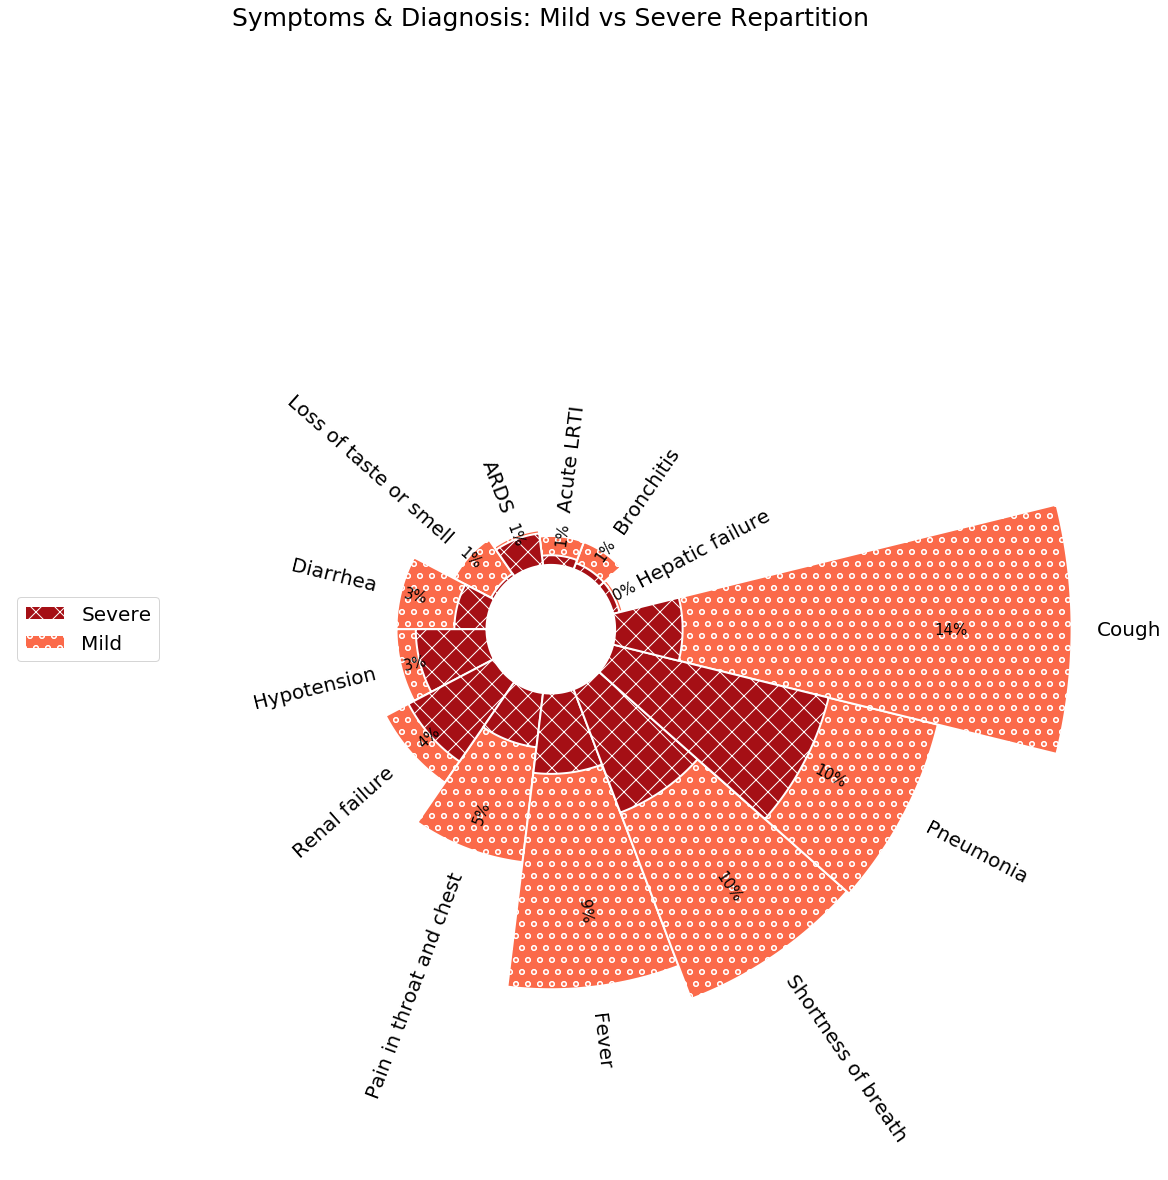

In [57]:
#circular barplot

# initialize the figure
plt.figure(figsize=(20,20))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Reorder the dataframe
df = df.sort_values(by=['%AllCOVID-19Patients'])

# Constants = parameters controling the plot layout:
labelPadding = 0.8
lowerlimit=2

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

heights=df['%AllCOVID-19Patients']

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width,
    bottom=lowerlimit,
    linewidth=2, 
    edgecolor="white",
    color="#fb6a4a",
    hatch="o",
    label='Mild'
)


# Draw bars
bars2 = ax.bar(
    x=angles, 
    height=df['%AllCOVID-19PatientsSevere'], 
    width=width,
    bottom=lowerlimit,
    linewidth=2, 
    edgecolor="white",
    color="#a50f15",
    hatch="x",
    label='Severe'
)


ax.legend([bars2, bars], ["Severe", "Mild"], loc=6,prop={'size': 20})
ax.set_title("Symptoms & Diagnosis: Mild vs Severe Repartition", size=25)


# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Diagnosis"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=bar.get_height() + labelPadding+ lowerlimit, 
        s=label, 
        size=20,
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
    
    
def autolabel(rects,col):
    """
    Attach a text label above each bar displaying its height
    """
    for bar, angle, height, label in zip(bars,angles, heights, df["Diagnosis"]):

    # Labels are rotated. Rotation must be specified in degrees :(
        rotation = np.rad2deg(angle)

        # Flip some labels upside down
        alignment = ""
        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else: 
            alignment = "left"

        # Finally add the labels
        ax.text(
            x=angle, 
            y=bar.get_height()*0.7+lowerlimit, 
            s=str(round(height))+'%', 
            size=15,
            color=col,
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor") 

autolabel(bars, "black")

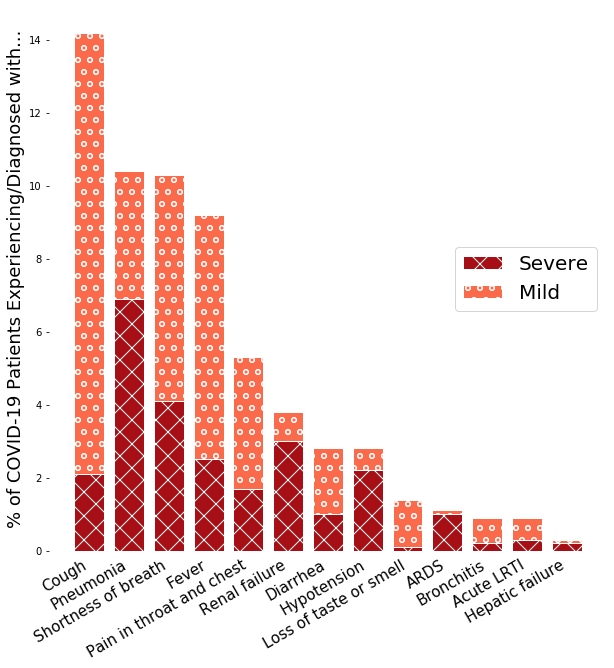

In [58]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111)

df = df.sort_values(by=['%AllCOVID-19Patients'], ascending=False)

width = 0.75       # the width of the bars: can also be len(x) sequence
#plt.axis('off')
plt.box(False)

prior=df['Diagnosis']
mild=df['%AllCOVID-19Patients']
severe=df['%AllCOVID-19PatientsSevere']


rect1=ax.bar(prior, mild, width, label='Mild', color="#fb6a4a", hatch = 'o', edgecolor="white")
rect2=ax.bar(prior, severe, width, label='Severe', color="#a50f15", hatch = 'x', edgecolor="white")

ax.legend([bars2, bars], ["Severe", "Mild"], loc=7, prop={'size': 20})
ax.xaxis.set_ticks_position('none')
plt.xticks(rotation=30, size=15, horizontalalignment="right")
ax.set_ylabel('% of COVID-19 Patients Experiencing/Diagnosed with...', fontsize=18)
#ax.get_yaxis().set_ticks([])




# Hide grid lines
ax.grid(False)


plt.show()

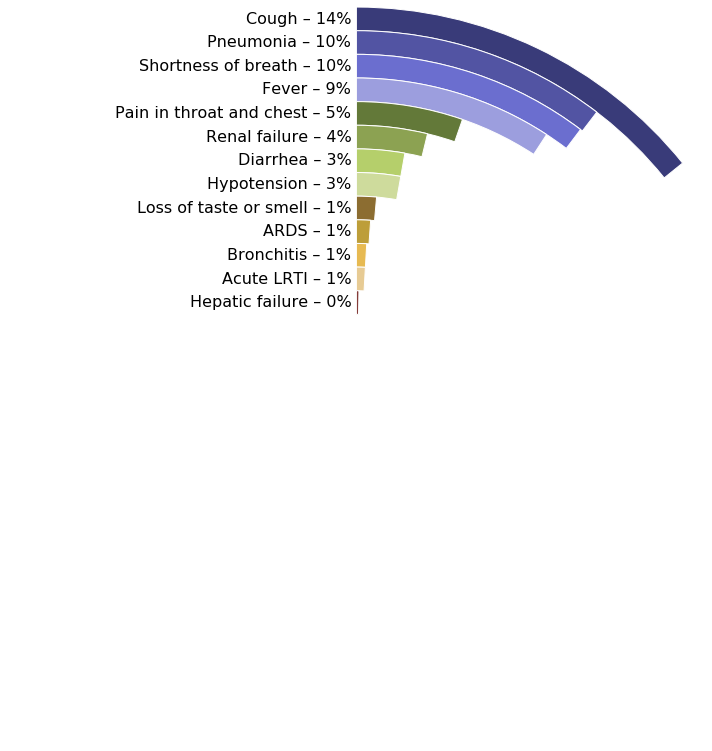

In [61]:
# initialize the figure
plt.figure(figsize=(10,10))
ax = plt.subplot(111)

cathegories = df['Diagnosis']
percent = df['%AllCOVID-19Patients']

# number of data points
n = len(percent)
# percent of circle to draw for the largest circle
percent_circle = percent.max() / 100

r = 1.5  # outer radius of the chart
r_inner = 0.4  # inner radius of the chart
# calculate width of each ring
w = (r - r_inner) / n

# create colors along a chosen colormap
#colors = [plt.cm.plasma(i / n) for i in range(n)]
colors = plt.cm.tab20b.colors

# create figure, axis
ax.axis("equal")

#ax.set_title("Comorbidities of Covid-19 Fatalities", size=40)

for i in range(n):
    radius = r - i * w
    ax.pie([percent[i] / percent.max() * percent_circle], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{cathegories[i]} – {percent[i]}%'],labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w/2, f'{cathegories[i]} – {int(round(percent[i]))}% ', ha='right', va='center', size=16)

#plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.1), prop={'size': 12})
plt.tight_layout()
plt.show()

# Part 3: Visualizing The Comorbidities

In [62]:
# Use pandas to read in the dataset
df = pd.read_csv("CDC_Table3.csv",encoding='cp1252')

In [63]:
df.head()

,ComorbiditiesCondition,COVID-19Deaths,%TotalCOVID-19Deaths
0,Influenza and pneumonia,248250,45.7
1,Respiratory failure,203850,37.5
2,Hypertensive diseases,107624,19.8
3,Diabetes,87008,16.0
4,Cardiac arrest,65801,12.1


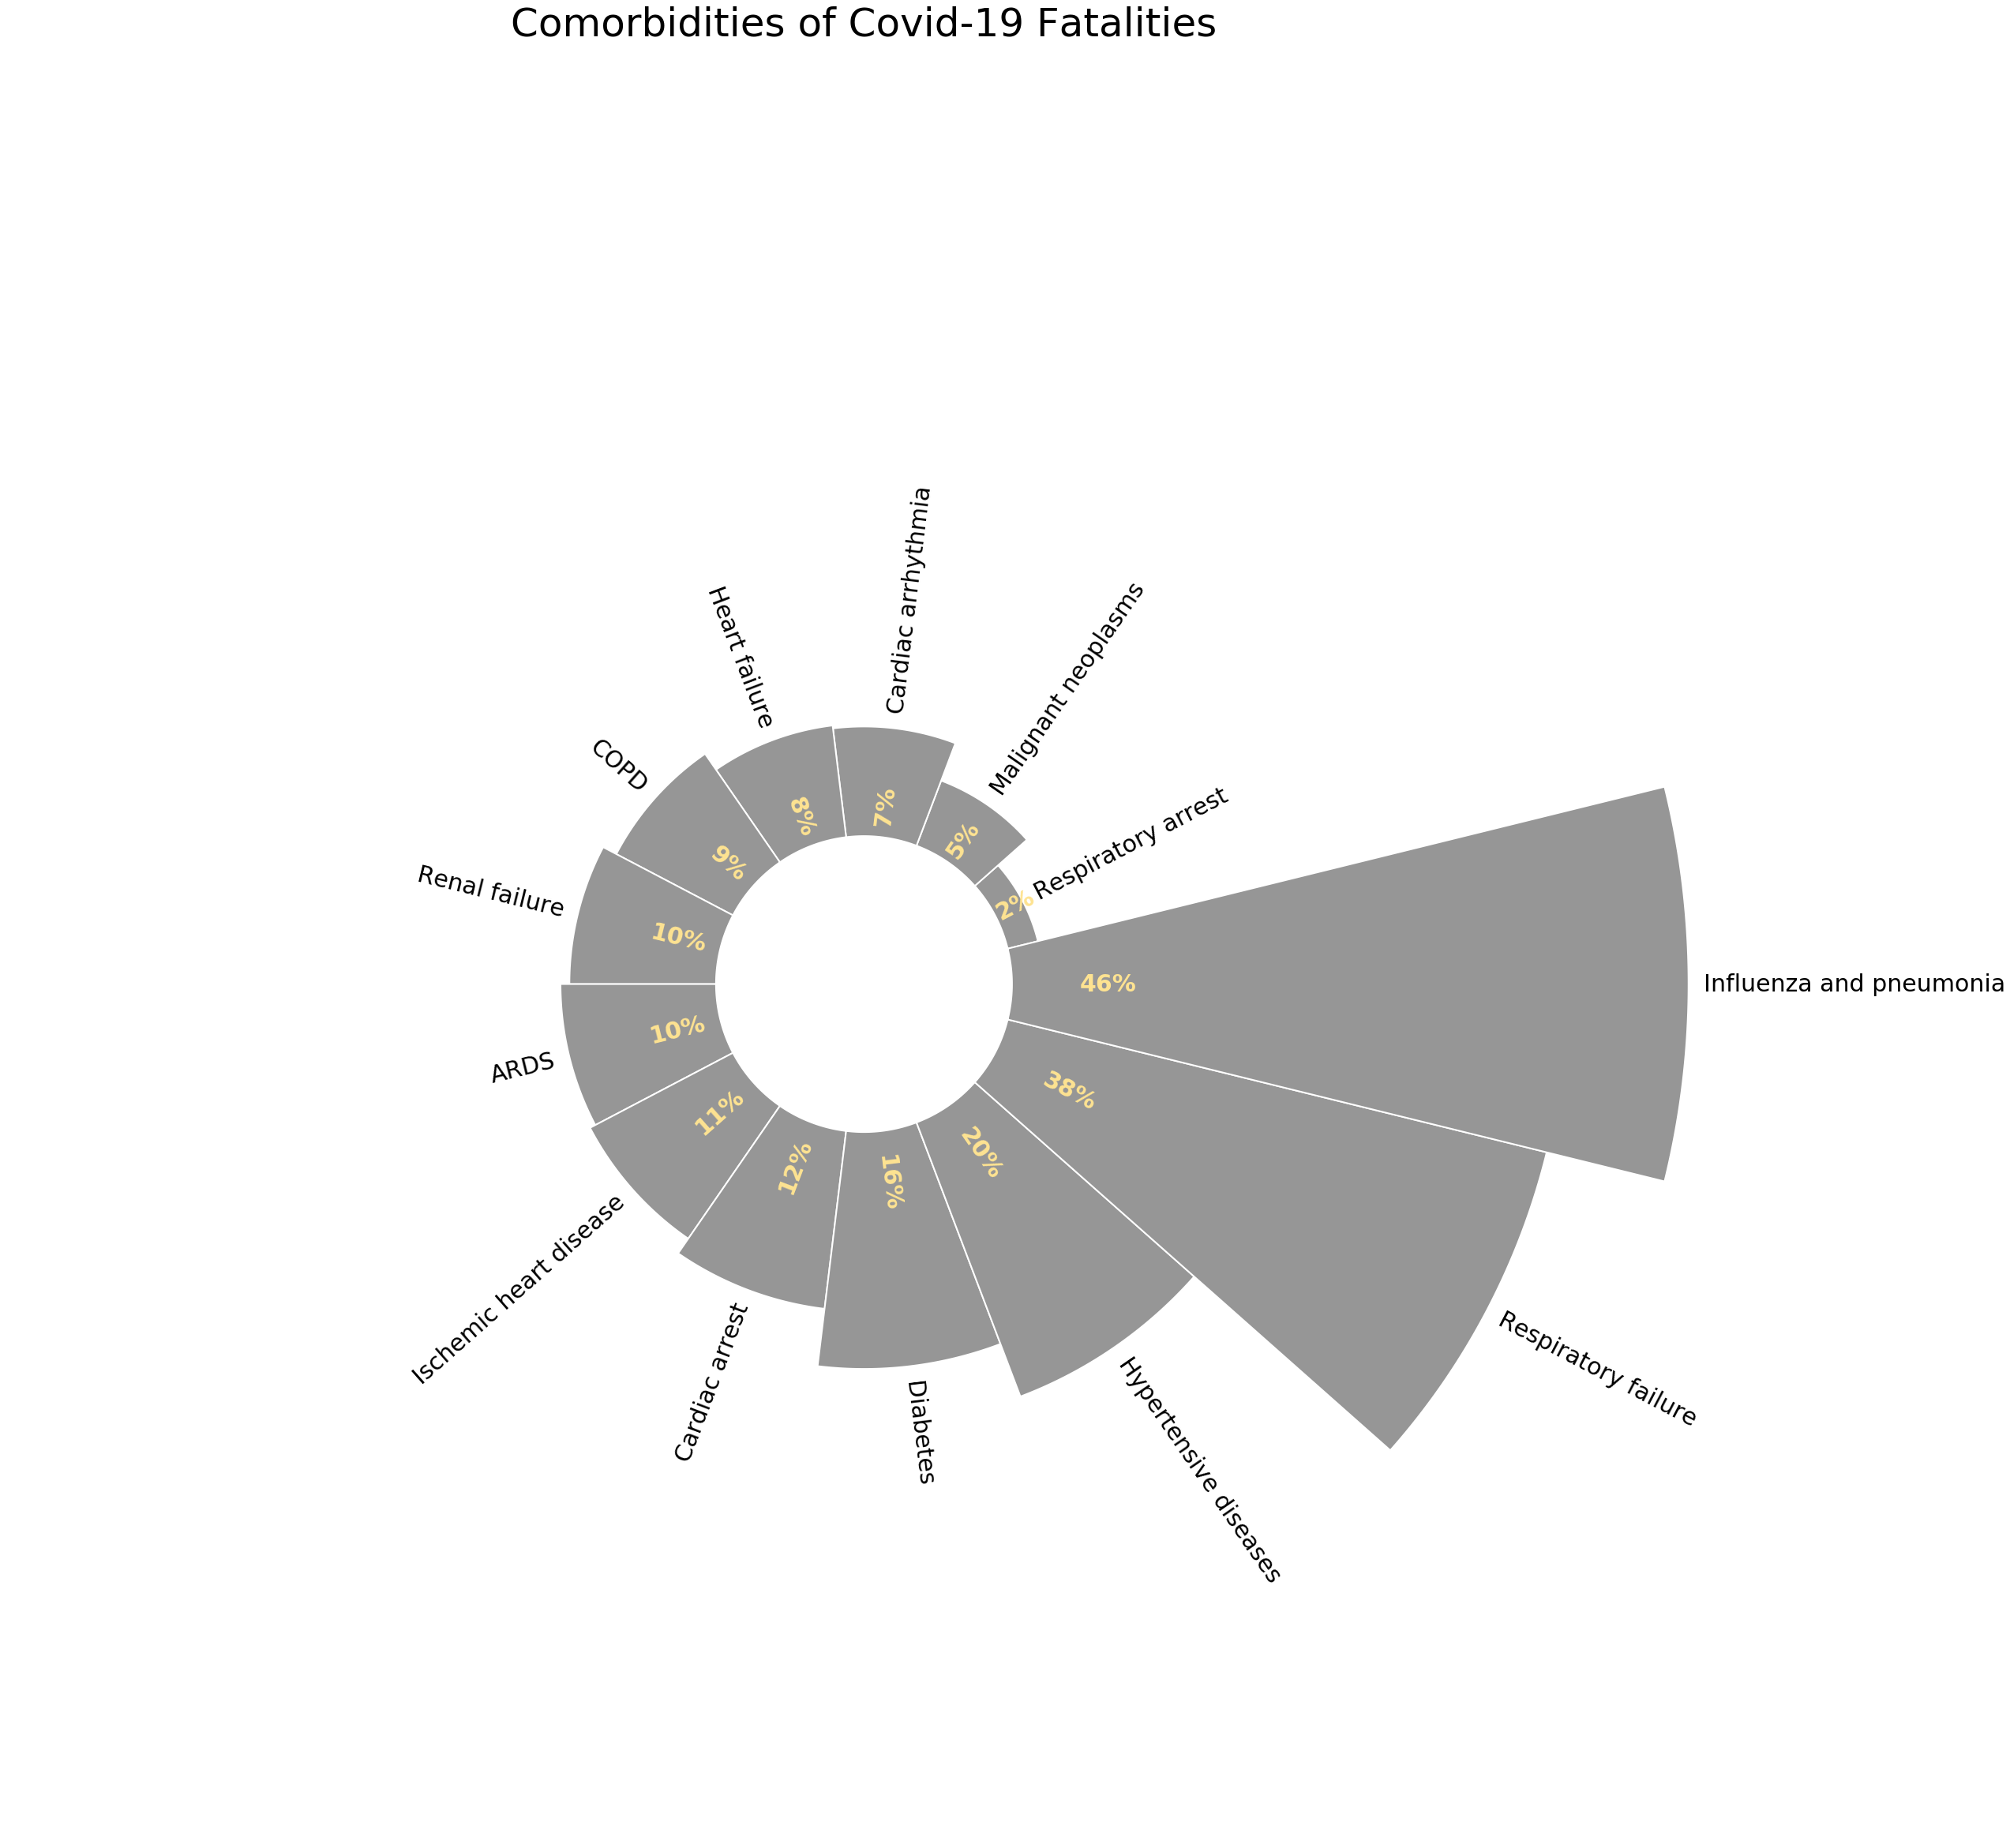

In [67]:
#circular barplot

# initialize the figure
plt.figure(figsize=(40,40))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Reorder the dataframe
df = df.sort_values(by=['%TotalCOVID-19Deaths'])

# Constants = parameters controling the plot layout:
labelPadding = 1
lowerlimit=10

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / (len(df.index))

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

heights=df['%TotalCOVID-19Deaths']

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width,
    bottom=lowerlimit,
    linewidth=2, 
    edgecolor="white",
    color="#969696"
)





ax.set_title("Comorbidities of Covid-19 Fatalities", size=50)


# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["ComorbiditiesCondition"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=bar.get_height() + labelPadding+ lowerlimit, 
        s=label, 
        size=30,
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
    
    
def autolabel(rects,col):
    """
    Attach a text label above each bar displaying its height
    """
    for bar, angle, height, label in zip(bars,angles, heights, df["ComorbiditiesCondition"]):

    # Labels are rotated. Rotation must be specified in degrees :(
        rotation = np.rad2deg(angle)

        # Flip some labels upside down
        alignment = ""
        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else: 
            alignment = "left"

        # Finally add the labels
        ax.text(
            x=angle, 
            y=bar.get_height()*0.1+lowerlimit, 
            s=str(round(height))+'%', 
            size=30,
            ha=alignment, 
            va='center',
            color=col,
            weight='bold',
            rotation=rotation, 
            rotation_mode="anchor") 

autolabel(bars, "#fee391")

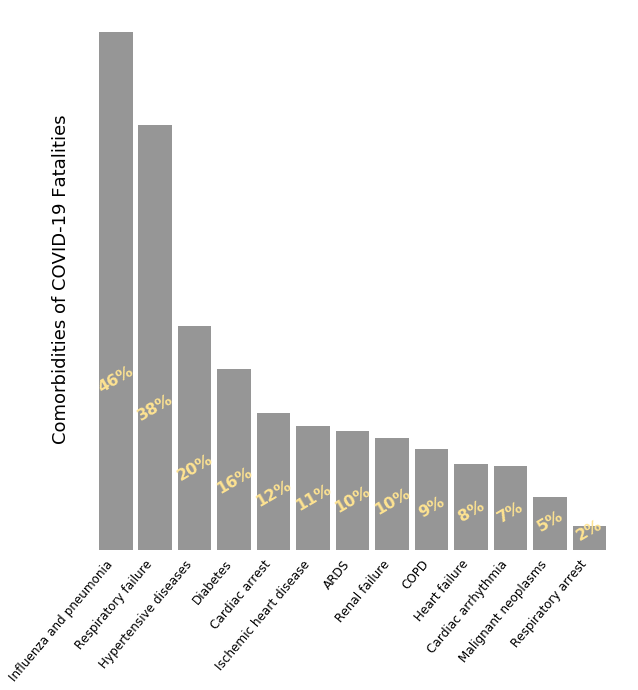

In [52]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111)

df = df.sort_values(by=['%TotalCOVID-19Deaths'], ascending=False)

width = 0.85       # the width of the bars: can also be len(x) sequence
#plt.axis('off')
plt.box(False)

prior=df['ComorbiditiesCondition']
mild=df['%TotalCOVID-19Deaths']


rect1=ax.bar(prior, mild, width, color="#969696")


ax.xaxis.set_ticks_position('none')
plt.xticks(rotation=50, size=12, horizontalalignment="right")
ax.set_ylabel('Comorbidities of COVID-19 Fatalities', fontsize=18)
ax.get_yaxis().set_ticks([])


def autolabel(rects,col):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.3*height,
                str(int(round(height)))+'%',
                ha='center', va='bottom', color=col, weight='bold', rotation=30, size=16)

autolabel(rect1, "#fee391")


# Hide grid lines
ax.grid(False)


plt.show()

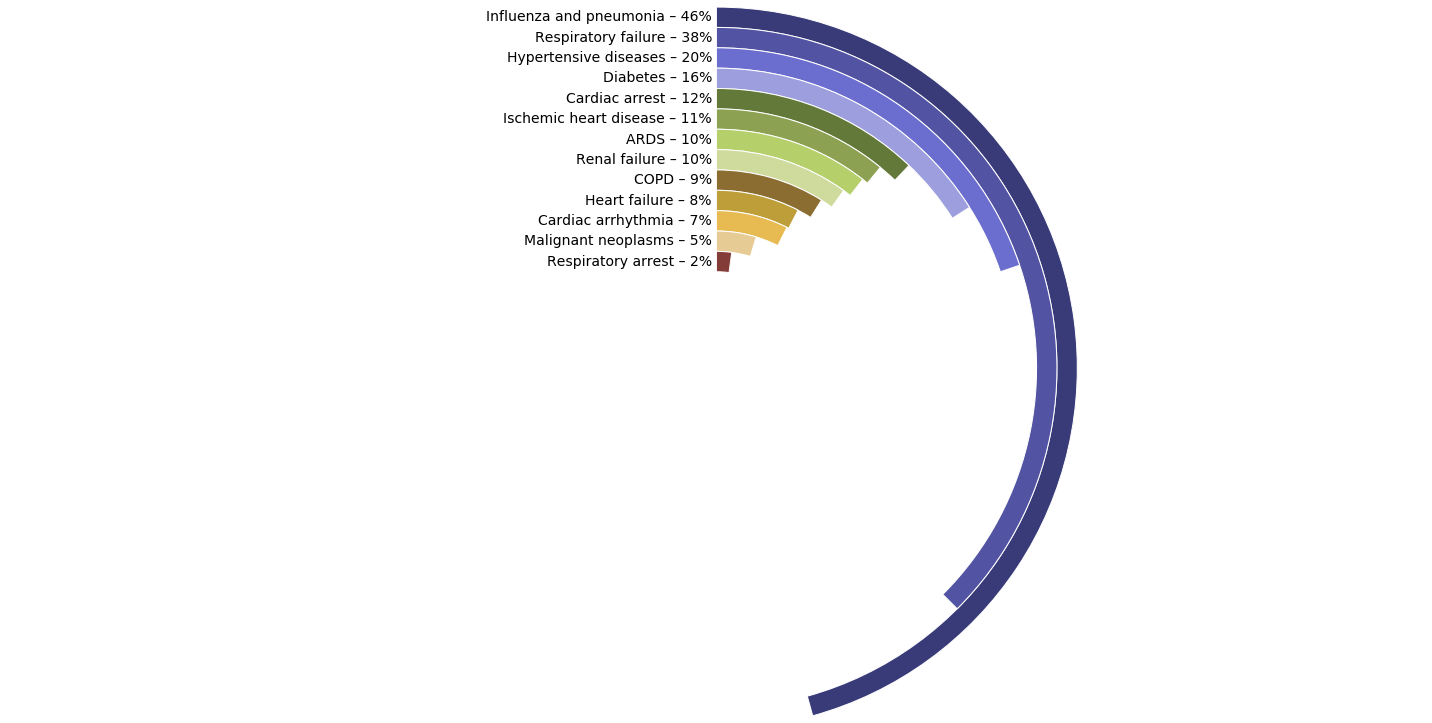

In [53]:
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111)

cathegories = df['ComorbiditiesCondition']
percent = df['%TotalCOVID-19Deaths']

# number of data points
n = len(percent)
# percent of circle to draw for the largest circle
percent_circle = percent.max() / 100

r = 1.5  # outer radius of the chart
r_inner = 0.4  # inner radius of the chart
# calculate width of each ring
w = (r - r_inner) / n

# create colors along a chosen colormap
#colors = [plt.cm.plasma(i / n) for i in range(n)]
colors = plt.cm.tab20b.colors

# create figure, axis
ax.axis("equal")

#ax.set_title("Comorbidities of Covid-19 Fatalities", size=40)

for i in range(n):
    radius = r - i * w
    ax.pie([percent[i] / percent.max() * percent_circle], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{cathegories[i]} – {percent[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w/2, f'{cathegories[i]} – {int(round(percent[i]))}% ', ha='right', va='center', size=14)

#plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.1), prop={'size': 12})
plt.tight_layout()
plt.show()

In [17]:
data = [{'id': 'All COVID-19 Deaths', 'datum': 100,'children' : [
    {'id' : "Influenza and pneumonia", 'datum' : 45.7},
    {'id': 'Respiratory failure', 'datum': 37.5},
    {'id' : "COPD", 'datum' : 8.9},
    {'id' : "ARDS", 'datum' : 10.5},
    {'id': 'Respiratory arrest', 'datum':2.1},
    {'id': 'Hypertensive diseases', 'datum': 19.8},
    {'id': 'Ischemic heart disease', 'datum': 10.9},
    {'id': 'Cardiac arrest', 'datum': 12.1},
    {'id': 'Cardiac arrhythmia', 'datum': 7.4},
    {'id': 'Malignant neoplasms', 'datum': 4.7},
    {'id': 'Heart failure', 'datum': 7.6},
    {'id': 'Diabetes', 'datum': 16},
    {'id': 'Renal failure', 'datum': 9.9}
]}]

In [18]:
# import the circlify library
import circlify

# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

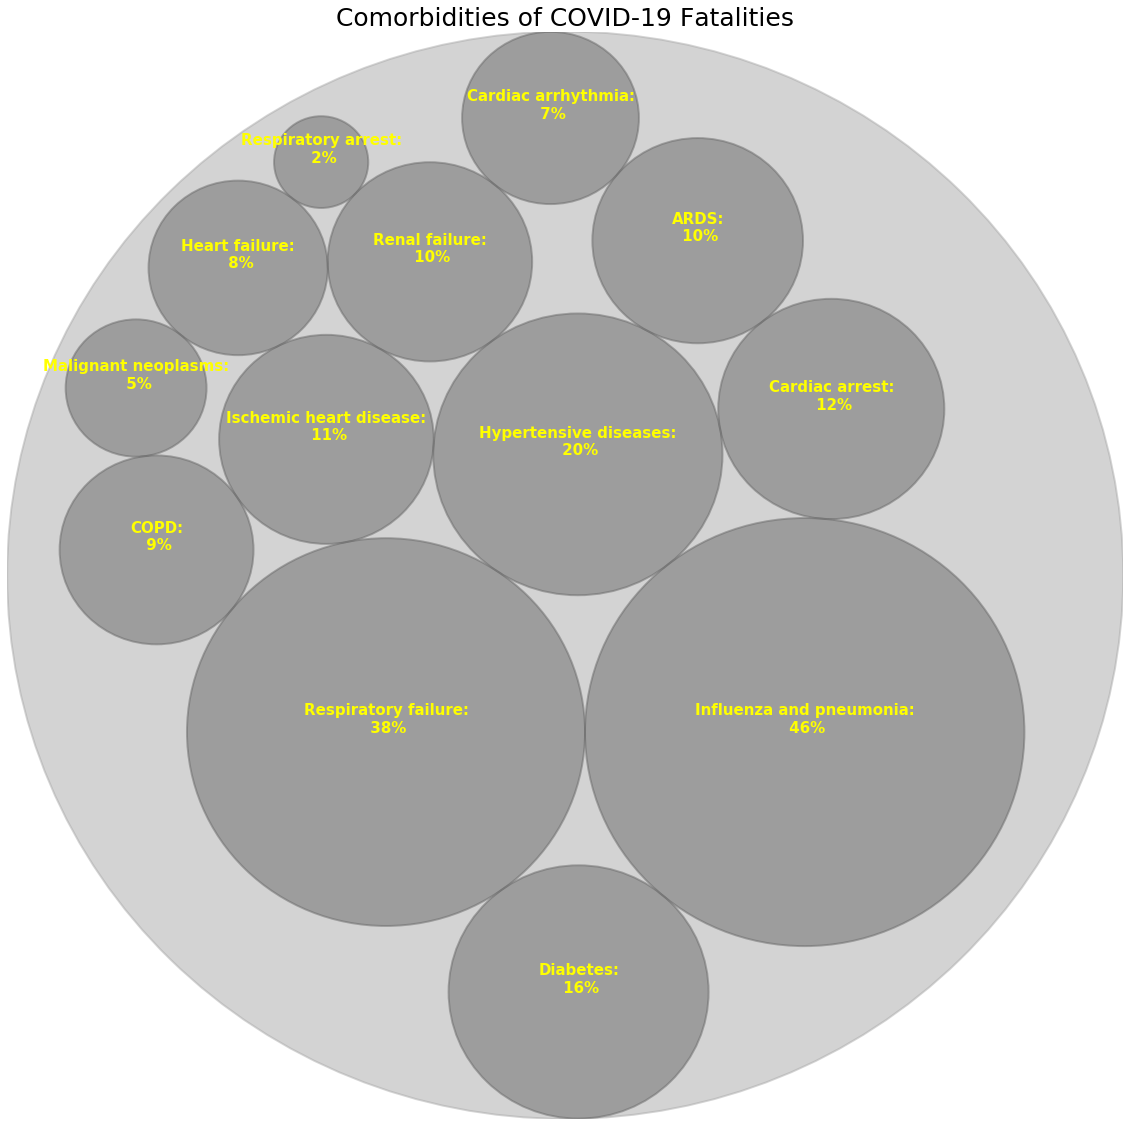

In [66]:
# import libraries
import circlify
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(20,20))

# Title
ax.set_title('Comorbidities of COVID-19 Fatalities', size=25)

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level:
for circle in circles:
    if circle.level != 1:
        continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="darkgray"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    label = circle.ex["id"]+":\n "+ str(int(round(circle.ex["datum"])))+"%"
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="dimgray"))
    plt.annotate(label, (x,y ), ha='center', color="yellow",weight="bold", size=15)






## Final Infographic: https://my.visme.co/view/8re9w8op-covid-19-uhc-timeline
